# Programming Assignment # 3 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Rachakonda Sravan Kumar

ID: 1001824673

NetID: sxr4673

Team Mate name : Srikala Challagundla

ID: 1001828083

NetID: sxc8083

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment. If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster adults using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is part of "Adult". You can find more information here: https://archive.ics.uci.edu/ml/datasets/adult.
The classification problem is whether they earn more than 50,000$ or not.



You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [26]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [27]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [28]:
#########################begin code for Task 1-a
#########################begin code for Task 1-a
adult_data_set = pd.read_csv('clusteringdata.csv')
print(adult_data_set.describe()) #out of 14 feature columns only 6 colums are numeric

               Age       Fnlwght  EducationNumber   CapitalGain  CapitalLoss  \
count  5000.000000  5.000000e+03      5000.000000   5000.000000  5000.000000   
mean     38.600200  1.907684e+05        10.079600   1033.640200    93.696800   
std      13.594695  1.063596e+05         2.534906   7051.802077   410.801418   
min      17.000000  1.930200e+04         1.000000      0.000000     0.000000   
25%      28.000000  1.176958e+05         9.000000      0.000000     0.000000   
50%      37.000000  1.794750e+05        10.000000      0.000000     0.000000   
75%      47.000000  2.416575e+05        12.000000      0.000000     0.000000   
max      90.000000  1.033222e+06        16.000000  99999.000000  2547.000000   

       HoursPerWeek  
count   5000.000000  
mean      40.519000  
std       12.109193  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000  


In [29]:
#Finding the missing values in the dataset
adult_data_set['WorkClass'] = adult_data_set['WorkClass'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)
adult_data_set['Occupation'] = adult_data_set['Occupation'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)
adult_data_set['NativeCountry'] = adult_data_set['NativeCountry'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)
print(adult_data_set.isna().sum()) #get the total number of missing values

Age                  0
WorkClass          331
Fnlwght              0
Education            0
EducationNumber      0
MaritalStatus        0
Occupation         331
Relationship         0
Race                 0
Sex                  0
CapitalGain          0
CapitalLoss          0
HoursPerWeek         0
NativeCountry       97
Class                0
dtype: int64


In [30]:
adult_data_set[adult_data_set.isnull().any(axis=1)] #columns with null values

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,17,NaN,139183,10th,6,Never-married,NaN,Own-child,White,Female,0,0,15,United-States,<=50K
4958,20,NaN,293136,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,35,United-States,<=50K
4970,51,NaN,203953,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,>50K
4980,45,NaN,144354,9th,5,Separated,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K


In [31]:
adult_data_set["WorkClass"].value_counts()

 Private             3435
 Self-emp-not-inc     383
 Local-gov            329
 State-gov            193
 Self-emp-inc         182
 Federal-gov          146
 Without-pay            1
Name: WorkClass, dtype: int64

In [32]:
adult_data_set["Occupation"].value_counts()

 Prof-specialty       625
 Craft-repair         619
 Exec-managerial      618
 Sales                588
 Adm-clerical         576
 Other-service        495
 Machine-op-inspct    312
 Transport-moving     247
 Handlers-cleaners    196
 Farming-fishing      143
 Tech-support         140
 Protective-serv       90
 Priv-house-serv       18
 Armed-Forces           2
Name: Occupation, dtype: int64

In [33]:
adult_data_set["NativeCountry"].value_counts()

 United-States                 4465
 Mexico                         104
 Canada                          28
 Philippines                     22
 Germany                         22
 England                         16
 Puerto-Rico                     16
 El-Salvador                     16
 Jamaica                         15
 China                           15
 Cuba                            14
 Dominican-Republic              13
 India                           12
 Italy                           12
 Iran                            11
 Vietnam                         10
 Taiwan                          10
 Guatemala                       10
 South                            9
 Poland                           9
 Japan                            9
 Portugal                         7
 Haiti                            6
 Greece                           6
 Nicaragua                        5
 Columbia                         5
 Ireland                          4
 Ecuador                    

In [34]:
#Filling the missing values with highest repeated value in the respective column
adult_data_set = adult_data_set.fillna({"WorkClass": "Private"}) #since Private is repeated more in the WorkClass
adult_data_set = adult_data_set.fillna({"Occupation": "Prof-specialty"})
adult_data_set = adult_data_set.fillna({"NativeCountry": "United-States"})

In [35]:
adult_data_set[adult_data_set.isnull().any(axis=1)] 
#We have handeled all the missing values in the given data set

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class


In [36]:
#Lets convert the string values to numeric
adult_data_set["WorkClass"] = adult_data_set["WorkClass"].astype('category')
adult_data_set["Education"] = adult_data_set["Education"].astype('category')
adult_data_set["MaritalStatus"] = adult_data_set["MaritalStatus"].astype('category')
adult_data_set["Occupation"] = adult_data_set["Occupation"].astype('category')
adult_data_set["Relationship"] = adult_data_set["Relationship"].astype('category')
adult_data_set["Race"] = adult_data_set["Race"].astype('category')
adult_data_set["Sex"] = adult_data_set["Sex"].astype('category')
adult_data_set["NativeCountry"] = adult_data_set["NativeCountry"].astype('category')
adult_data_set["Class"] = adult_data_set["Class"].astype('category')
print(adult_data_set.dtypes)

Age                   int64
WorkClass          category
Fnlwght               int64
Education          category
EducationNumber       int64
MaritalStatus      category
Occupation         category
Relationship       category
Race               category
Sex                category
CapitalGain           int64
CapitalLoss           int64
HoursPerWeek          int64
NativeCountry      category
Class              category
dtype: object


In [37]:
adult_data_set["WorkClass_cat"] = adult_data_set["WorkClass"].cat.codes
adult_data_set["Education_cat"] = adult_data_set["Education"].cat.codes
adult_data_set["MaritalStatus_cat"] = adult_data_set["MaritalStatus"].cat.codes
adult_data_set["Occupation_cat"] = adult_data_set["Occupation"].cat.codes
adult_data_set["Relationship_cat"] = adult_data_set["Relationship"].cat.codes
adult_data_set["Race_cat"] = adult_data_set["Race"].cat.codes
adult_data_set["Sex_cat"] = adult_data_set["Sex"].cat.codes
adult_data_set["NativeCountry_cat"] = adult_data_set["NativeCountry"].cat.codes
adult_data_set["Class_cat"] = adult_data_set["Class"].cat.codes
adult_data_set.drop(['WorkClass','Education','MaritalStatus','Occupation','Relationship','Race','Sex','NativeCountry','Class'], axis=1)

,Age,Fnlwght,EducationNumber,CapitalGain,CapitalLoss,HoursPerWeek,WorkClass_cat,Education_cat,MaritalStatus_cat,Occupation_cat,Relationship_cat,Race_cat,Sex_cat,NativeCountry_cat,Class_cat
0,39,77516,13,2174,0,40,5,9,4,0,1,4,1,36,0
1,50,83311,13,0,0,13,4,9,2,3,0,4,1,36,0
2,38,215646,9,0,0,40,2,11,0,5,1,4,1,36,0
3,53,234721,7,0,0,40,2,1,2,5,0,2,1,36,0
4,28,338409,13,0,0,40,2,9,2,9,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,222971,3,0,0,40,2,4,4,6,4,4,0,23,0
4996,31,259425,9,0,0,40,2,11,2,2,0,4,1,36,1
4997,47,212120,9,0,0,40,3,11,2,2,0,4,1,36,1
4998,26,245880,9,0,0,60,2,11,4,0,1,4,1,36,0


In [38]:
adult_data_set = adult_data_set[['Age','WorkClass_cat','Fnlwght','Education_cat','EducationNumber','MaritalStatus_cat','Occupation_cat','Relationship_cat','Race_cat','Sex_cat','CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry_cat','Class_cat']]
print(adult_data_set)

      Age  WorkClass_cat  Fnlwght  Education_cat  EducationNumber  \
0      39              5    77516              9               13   
1      50              4    83311              9               13   
2      38              2   215646             11                9   
3      53              2   234721              1                7   
4      28              2   338409              9               13   
...   ...            ...      ...            ...              ...   
4995   43              2   222971              4                3   
4996   31              2   259425             11                9   
4997   47              3   212120             11                9   
4998   26              2   245880             11                9   
4999   58              1    54947             15               10   

      MaritalStatus_cat  Occupation_cat  Relationship_cat  Race_cat  Sex_cat  \
0                     4               0                 1         4        1   
1          

As asked in the question: Taking the whole given dataset for performing elbow method


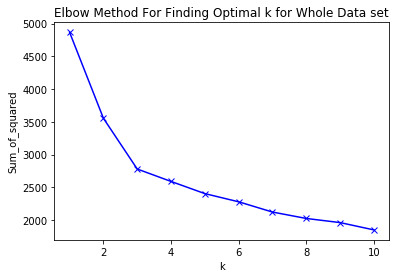

2589.574789350456
For this data set k = 3(clusters) is Optimal value using Elbow Method


In [39]:
print("As asked in the question: Taking the whole given dataset for performing elbow method")

mms = MinMaxScaler()
mms.fit(adult_data_set.iloc[:,0:15])
data_transformed = mms.transform(adult_data_set.iloc[:,0:15])

Sum_of_squared = []
K = range(1,11)
for k in K:
    kmeansmodel = KMeans(n_clusters=k)
    kmeansmodel = kmeansmodel.fit(data_transformed)
    Sum_of_squared.append(kmeansmodel.inertia_)
    
plt.plot(K, Sum_of_squared, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared')
plt.title('Elbow Method For Finding Optimal k for Whole Data set')
plt.show()
print(Sum_of_squared[3]);
print("For this data set k = 3(clusters) is Optimal value using Elbow Method");

print("Comments")
print("To predict the clusters value for the given dataset, we need to consider only the feature values thats why excluding the target(class column) in the data set and performing the elbow method to valiadate the cluster value before going to task1-b")
mms = MinMaxScaler()
mms.fit(adult_data_set.iloc[:,0:14])
data_transformed = mms.transform(adult_data_set.iloc[:,0:14])

Sum_of_squared = []
K = range(1,11)
for k in K:
    kmeansmodel = KMeans(n_clusters=k)
    kmeansmodel = kmeansmodel.fit(data_transformed)
    Sum_of_squared.append(kmeansmodel.inertia_)
    
plt.plot(K, Sum_of_squared, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared')
plt.title('Elbow Method For Finding Optimal k without taking Class Column')
plt.show()
print(Sum_of_squared[2]);
print("For this data set k = 2(clusters) is Optimal value using Elbow Method");

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [40]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

### Important!!!
data_columns = ["Fnlwght","CapitalGain","CapitalLoss"]
for k in data_columns:
    x = adult_data_set[k].values
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
    adult_data_set[k] = pd.DataFrame(x_scaled)

columns = ['Age','WorkClass_cat','Fnlwght','Education_cat','EducationNumber','MaritalStatus_cat','Occupation_cat','Relationship_cat','Race_cat','Sex_cat','CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry_cat']
X = adult_data_set[columns]
Y = adult_data_set.Class_cat

# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test
print(X_train)
###################end code for Task 1-b-1

      Age  WorkClass_cat   Fnlwght  Education_cat  EducationNumber  \
1334   51              2  0.125715              8               11   
4768   40              0  0.275498             12               14   
65     36              2  0.134365             11                9   
177    34              2  0.458098             11                9   
4489   28              2  0.169367              7               12   
...   ...            ...       ...            ...              ...   
2895   45              2  0.325028             15               10   
2763   24              0  0.283270             11                9   
905    46              2  0.150158             11                9   
3980   55              7  0.086205              7               12   
235    59              5  0.245974             11                9   

      MaritalStatus_cat  Occupation_cat  Relationship_cat  Race_cat  Sex_cat  \
1334                  2               9                 0         4        1   

[1 1 0 ... 1 1 1]
[[2.82336601e+01 2.50762527e+00 1.75877811e-01 1.03180828e+01
  9.91830065e+00 2.99183007e+00 6.57407407e+00 1.84095861e+00
  3.63180828e+00 6.36165577e-01 4.82582713e-03 2.38312749e-02
  3.84547930e+01 3.42254902e+01]
 [5.04957933e+01 2.54206731e+00 1.61449048e-01 1.01875000e+01
  1.01953125e+01 2.22475962e+00 6.48437500e+00 1.07812500e+00
  3.65564904e+00 7.16947115e-01 1.43493562e-02 4.69750423e-02
  4.26412260e+01 3.45000000e+01]]


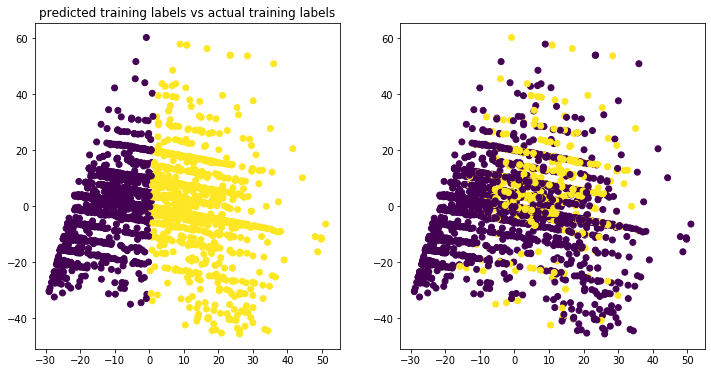

In [41]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model
kmeans_model = KMeans(n_clusters=2, random_state=2).fit(X_train)
labels = kmeans_model.predict(X_train)
print(labels)
centroids = kmeans_model.cluster_centers_
print(centroids)
# Compute cluster centers and predict cluster index for each sample 

f, axs = plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)

# Model and fit the data to the PCA model
X_train_pca = PCA(2)

plot_columns = X_train_pca.fit_transform(X_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.title('predicted training labels vs actual training labels')
#plt.show()

plt.subplot(1,2,2)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=Y_train)
#plt.show()

###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

[[2.82336601e+01 2.50762527e+00 1.75877811e-01 1.03180828e+01
  9.91830065e+00 2.99183007e+00 6.57407407e+00 1.84095861e+00
  3.63180828e+00 6.36165577e-01 4.82582713e-03 2.38312749e-02
  3.84547930e+01 3.42254902e+01]
 [5.04957933e+01 2.54206731e+00 1.61449048e-01 1.01875000e+01
  1.01953125e+01 2.22475962e+00 6.48437500e+00 1.07812500e+00
  3.65564904e+00 7.16947115e-01 1.43493562e-02 4.69750423e-02
  4.26412260e+01 3.45000000e+01]]


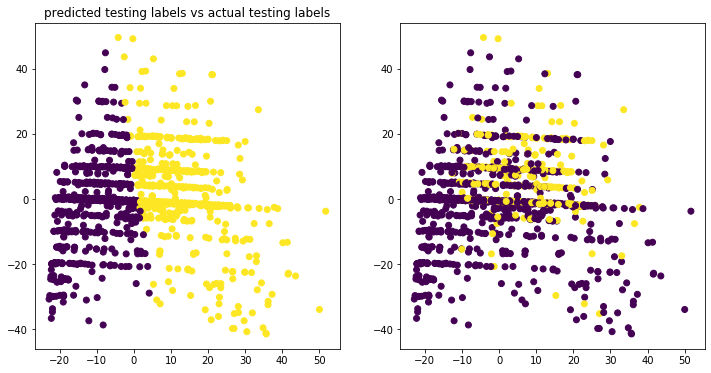

In [42]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
test_labels = kmeans_model.predict(X_test)
centroids = kmeans_model.cluster_centers_
print(centroids)

# Model and fit the data to the PCA model
X_test_pca = PCA(2)

f, axs = plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)

plot_columns = X_test_pca.fit_transform(X_test)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=test_labels)
plt.title('predicted testing labels vs actual testing labels')

plt.subplot(1,2,2)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=Y_test)


###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [43]:
###################begin code for Task 1-b-4: Print out a confusion matrix

print (confusion_matrix(Y_train,labels))
print (confusion_matrix(Y_test,test_labels))
###################end code for Task 1-b-4

[[1581 1049]
 [ 255  615]]
[[721 428]
 [120 231]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [44]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(X_train)
print(pdm_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
hc_cc = AgglomerativeClustering(n_clusters = 2, affinity = 'cosine', linkage ='complete')
y_hc_cc=hc_cc.fit_predict(X_train)
print(y_hc_cc)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
hc_ec = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete')
y_hc_ec=hc_ec.fit_predict(X_train)
print(y_hc_ec)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
hc_mc = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage ='complete')
y_hc_mc=hc_mc.fit_predict(X_train)
print(y_hc_mc)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
hc_ca = AgglomerativeClustering(n_clusters = 2, affinity = 'cosine', linkage ='average')
y_hc_ca=hc_ca.fit_predict(X_train)
print(y_hc_ca)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
hc_ea = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')
y_hc_ea=hc_ea.fit_predict(X_train)
print(y_hc_ea)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
hc_ma = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage ='average')
y_hc_ma=hc_ma.fit_predict(X_train)
print(y_hc_ma)


print("F1-score for complete linkage + cosine:", f1_score(Y_train, y_hc_cc))
print("F1-score for complete linkage + euclidean:", f1_score(Y_train, y_hc_ec))
print("F1-score for complete linkage + manhattan:", f1_score(Y_train, y_hc_mc))
print("F1-score for average linkage + cosine:", f1_score(Y_train, y_hc_ca))
print("F1-score for average linkage + euclidean:", f1_score(Y_train, y_hc_ea))
print("F1-score for average linkage + manhattan:", f1_score(Y_train, y_hc_ma))
###################end code for Task 2-a

[[ 0.         15.7981039  16.94107655 ...  7.549874   21.72559691
   9.48759518]
 [15.7981039   0.         15.38107833 ... 14.23282692 28.09970611
  22.96864218]
 [16.94107655 15.38107833  0.         ... 11.22498327 30.96776258
  23.72788353]
 ...
 [ 7.549874   14.23282692 11.22498327 ...  0.         23.00008891
  13.74806098]
 [21.72559691 28.09970611 30.96776258 ... 23.00008891  0.
  22.31648552]
 [ 9.48759518 22.96864218 23.72788353 ... 13.74806098 22.31648552
   0.        ]]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 1]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 0]
F1-score for complete linkage + cosine: 0.04815650865312265
F1-score for complete linkage + euclidean: 0.2644351464435147
F1-score for complete linkage + manhattan: 0.33269107257546565
F1-score for average linkage + cosine: 0.03937007874015748
F1-score for average linkage + euclidean: 0.013574660633484162
F1-score for average linkage + manhattan: 0.049951969260326606


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

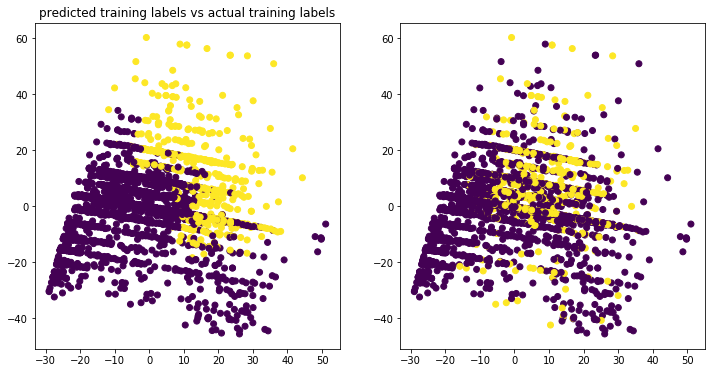

In [45]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualize the predicted training labels versus actual training labels.
# Model and fit the data to the PCA model
X_train_pca = PCA(2)

f, axs = plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)

plot_columns = X_train_pca.fit_transform(X_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=y_hc_mc)
plt.title('predicted training labels vs actual training labels')
#plt.show()

plt.subplot(1,2,2)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=Y_train)
#plt.show()


###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

[0 1 0 ... 1 0 1]
[[ 0.         29.41089093  8.42727905 ...  9.84977648 24.45461196
  27.00001793]
 [29.41089093  0.         30.10011686 ... 27.56839022 53.13215324
  43.86343332]
 [ 8.42727905 30.10011686  0.         ...  9.79795959 24.18679163
  26.00048307]
 ...
 [ 9.84977648 27.56839022  9.79795959 ...  0.         29.17192329
  20.54322345]
 [24.45461196 53.13215324 24.18679163 ... 29.17192329  0.
  33.89742559]
 [27.00001793 43.86343332 26.00048307 ... 20.54322345 33.89742559
   0.        ]]
F1-score for complete linkage + cosine: 0.04611923509561305
F1-score for complete linkage + euclidean: 0.04942084942084943
F1-score for complete linkage + manhattan: 0.3692579505300353
F1-score for average linkage + cosine: 0.0
F1-score for average linkage + euclidean: 0.012892828364222403
F1-score for average linkage + manhattan: 0.0


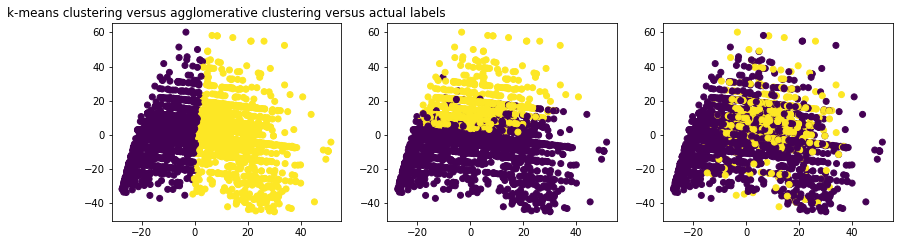

In [46]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
# Create the KMeans model
kmeans_model_labels = KMeans(n_clusters=2, random_state=2).fit_predict(adult_data_set.iloc[:,0:14])
print(kmeans_model_labels)
### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm = pairwise_distances(adult_data_set.iloc[:,0:14])
print(pdm)

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
hc_cc = AgglomerativeClustering(n_clusters = 2, affinity = 'cosine', linkage ='complete').fit_predict(adult_data_set.iloc[:,0:14])

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
hc_ec = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete').fit_predict(adult_data_set.iloc[:,0:14])


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
hc_mc = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage ='complete').fit_predict(adult_data_set.iloc[:,0:14])


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
hc_ca = AgglomerativeClustering(n_clusters = 2, affinity = 'cosine', linkage ='average').fit_predict(adult_data_set.iloc[:,0:14])


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
hc_ea = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average').fit_predict(adult_data_set.iloc[:,0:14])


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
hc_ma = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage ='average').fit_predict(adult_data_set.iloc[:,0:14])


print("F1-score for complete linkage + cosine:", f1_score(adult_data_set['Class_cat'], hc_cc))
print("F1-score for complete linkage + euclidean:", f1_score(adult_data_set['Class_cat'], hc_ec))
print("F1-score for complete linkage + manhattan:", f1_score(adult_data_set['Class_cat'], hc_mc))
print("F1-score for average linkage + cosine:", f1_score(adult_data_set['Class_cat'], hc_ca))
print("F1-score for average linkage + euclidean:", f1_score(adult_data_set['Class_cat'], hc_ea))
print("F1-score for average linkage + manhattan:", f1_score(adult_data_set['Class_cat'], hc_ma))


### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(2)

f, axs = plt.subplots(figsize=(14,8))
plot_columns = X_pca.fit_transform(adult_data_set.iloc[:,0:14])
plt.subplot(2,3,1)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=kmeans_model_labels)
plt.title('k-means clustering versus agglomerative clustering versus actual labels')
#plt.show()

plt.subplot(2,3,2)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=hc_mc)
#plt.show()

plt.subplot(2,3,3)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=adult_data_set.Class_cat)
#plt.show()

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 


###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [47]:
###################begin code for Task 3-b

print (confusion_matrix(adult_data_set['Class_cat'],kmeans_model_labels))
print (confusion_matrix(adult_data_set['Class_cat'],hc_mc))
print("--------------------------------------------------------------------------------")
print(classification_report(adult_data_set['Class_cat'],kmeans_model_labels))
print(classification_report(adult_data_set['Class_cat'],hc_mc))

print("The accuracy of the model is good when the data is trained with Agglomerative Clustering compared to K-Means Clustering ")

###################end code for Task 3-b

[[2341 1438]
 [ 403  818]]
[[3154  625]
 [ 803  418]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.62      0.72      3779
           1       0.36      0.67      0.47      1221

    accuracy                           0.63      5000
   macro avg       0.61      0.64      0.59      5000
weighted avg       0.73      0.63      0.66      5000

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      3779
           1       0.40      0.34      0.37      1221

    accuracy                           0.71      5000
   macro avg       0.60      0.59      0.59      5000
weighted avg       0.70      0.71      0.71      5000

The accuracy of the model is good when the data is trained with Agglomerative Clustering compared to K-Means Clustering 


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels 
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points